## Machine Learning Model Building Pipeline: Feature Engineering

In the following videos, we will take you through a practical example of each one of the steps in the Machine Learning model building pipeline, which we described in the previous lectures. There will be a notebook for each one of the Machine Learning Pipeline steps:

1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building

**This is the notebook for step 2: Feature Engineering**

We will use the house price dataset available on [Kaggle.com](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). See below for more details.

===================================================================================================

## Predicting Sale Price of Houses

The aim of the project is to build a machine learning model to predict the sale price of homes based on different explanatory variables describing aspects of residential houses. 

### Why is this important? 

Predicting house prices is useful to identify fruitful investments, or to determine whether the price advertised for a house is over or under-estimated.

### What is the objective of the machine learning model?

We aim to minimise the difference between the real price and the price estimated by our model. We will evaluate model performance using the mean squared error (mse) and the root squared of the mean squared error (rmse).

### How do I download the dataset?

To download the House Price dataset go this website:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Scroll down to the bottom of the page, and click on the link 'train.csv', and then click the 'download' blue button towards the right of the screen, to download the dataset. Rename the file as 'houseprice.csv' and save it to a directory of your choice.

**Note the following:**
-  You need to be logged in to Kaggle in order to download the datasets.
-  You need to accept the terms and conditions of the competition to download the dataset
-  If you save the file to the same directory where you saved this jupyter notebook, then you can run the code as it is written here.

====================================================================================================

## House Prices dataset: Feature Engineering

In the following cells, we will engineer / pre-process the variables of the House Price Dataset from Kaggle. We will engineer the variables so that we tackle:

1. Missing values
2. Temporal variables
3. Non-Gaussian distributed variables
4. Categorical variables: remove rare labels
5. Categorical variables: convert strings to numbers
5. Standarise the values of the variables to the same range

### Setting the seed

It is important to note that we are engineering variables and pre-processing data with the idea of deploying the model. Therefore, from now on, for each step that includes some element of randomness, it is extremely important that we **set the seed**. This way, we can obtain reproducibility between our research and our development code.

This is perhaps one of the most important lessons that you need to take away from this course: **Always set the seeds**.

Let's go ahead and load the dataset.

In [2]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.simplefilter(action='ignore')

In [3]:
def clean_names(df):
    """
        Lowers all column names and replaces spaces with _

        Parameters:
            - df : dataframe
                Dataframe

        Returns:
            - Renamed dataframe columns
    """
    df.columns = map(str.lower, df.columns)
    df.columns = df.columns.str.replace(" ", '_')
    df.columns = df.columns.str.replace(".", '_')
    return df



In [ ]:

# Read in postcode data
df_postcode = pd.read_csv("../data/raw/postcodes.csv")
df_postcode = clean_names(df_postcode)
df_postcode.columns


In [ ]:
df_postcode.head()

In [ ]:
df_postcode = df_postcode[['postcode', 'latitude', 'longitude']]
df_postcode.head()

In [4]:
# load dataset
data = pd.read_csv('../data/processed/train.csv')
# rows and columns of the data
print(data.shape)


#data = clean_names(data)
data["london_zone"].fillna(0, inplace=True)
data = pd.get_dummies(data=data, columns=["type", "land", "new_build"])
data = data.drop(['price', 'date', 'month_year', 'current_month', 'hpi_date','record', 'ppd', 'new_build_N', 'land_L','land_U' ], axis=1)
# visualise the dataset
data['london_zone'] = data['london_zone'].replace(0,data.london_zone.max()+1)
data.london_zone.unique()
data.head()

(68704, 48)


,id,postcode,primary_address,secondary_address,street,latitude,longitude,grid_ref,county,district,ward,district_code,ward_code,county_code,constituency,region,london_zone,middle_layer_super_output_area,postcode_area,postcode_district,quality,user_type,last_updated,nearest_station,distance_to_station,postcode_area.1,postcode_district.1,police_force,water_company,plus_code,average_income,sewage_company,travel_to_work_area,rural_urban,altitude,region_name,area_code,adjusted_price,type_D,type_F,type_O,type_S,type_T,land_F,new_build_Y
0,{F54AEAF3-DBBC-48F3-A81E-08BEDC2F6158},DE1 3RS,12,NaN,ST PAULS ROAD,52.930384,-1.474133,SK354371,Derbyshire,Derby,Darley,E06000015,E05001775,E10000007,Derby North,East Midlands,8.0,Little Chester,DE,DE1,1.0,0.0,2020-11-21,Derby,1.698510,DE,DE1,Derbyshire,Severn Trent,9C4WWGJG+58,33800.0,NaN,Derby,Urban city and town,51.0,City of Derby,E06000015,352676,0,0,0,0,1,1,0
1,{2A289EA0-255D-CDC8-E050-A8C063054829},WV11 3HP,83,NaN,LICHFIELD ROAD,52.603663,-2.079130,SJ947006,West Midlands,Wolverhampton,Wednesfield South,E08000031,E05001340,E11000018,Wolverhampton North East,West Midlands,8.0,Wednesfield North East,WV,WV11,1.0,0.0,2020-11-21,Wolverhampton,3.243360,WV,WV11,West Midlands,Severn Trent,9C4VJW3C+F8,31300.0,NaN,Wolverhampton and Walsall,Urban major conurbation,150.0,Wolverhampton,E08000031,199300,0,0,0,0,1,1,0
2,{580744CF-70DE-4064-B2A1-25B8CADD7846},B24 9LA,187,NaN,HOLLY LANE,52.524354,-1.826774,SP118918,West Midlands,Birmingham,Erdington,E08000025,E05011135,E11000018,"Birmingham, Erdington",West Midlands,8.0,Birches Green,B,B24,1.0,0.0,2020-11-21,Erdington,0.965453,B,B24,West Midlands,Severn Trent,9C4WG5FF+P7,36400.0,NaN,Birmingham,Urban major conurbation,111.0,Birmingham,E08000025,200520,1,0,0,0,0,1,0
3,{3985BB26-EB87-4C2E-84A2-275D2E500182},BN16 3RX,12,NaN,CRUNDENS CORNER,50.815543,-0.491088,TQ063028,West Sussex,Arun,Rustington East,E07000224,E05009820,E10000032,Worthing West,South East,8.0,Angmering South,BN,BN16,1.0,0.0,2020-11-21,Angmering,0.165164,BN,BN16,Sussex,Southern Water,9C2XRG85+6H,41800.0,NaN,Chichester and Bognor Regis,Urban city and town,8.0,Arun,E07000224,278490,0,0,0,0,1,1,0
4,{4C4EDFFF-4F93-1854-E050-A8C063054F34},M28 1DF,126,NaN,CHADDOCK LANE,53.504330,-2.427883,SD717009,Greater Manchester,Salford,Boothstown and Ellenbrook,E08000006,E05000760,E11000010,Worsley and Eccles South,North West,8.0,Ellenbrook & Boothstown,M,M28,1.0,0.0,2020-11-21,Walkden,2.701070,M,M28,Greater Manchester,United Utilities,9C5VGH3C+PR,51600.0,NaN,Manchester,Urban major conurbation,41.0,Salford,E08000006,140421,0,0,0,0,1,1,0


In [ ]:
data.dtypes

In [ ]:
data = pd.merge(data, df_postcode, how='left', on='postcode')

In [ ]:
data.head()

## Separate dataset into train and test

Before beginning to engineer our features, it is important to separate our data intro training and testing set. When we engineer features, some techniques learn parameters from data. It is important to learn this parameters only from the train set. This is to avoid over-fitting. 

**Separating the data into train and test involves randomness, therefore, we need to set the seed.**

In [5]:
# Let's separate into train and test set
# Remember to set the seed (random_state for this sklearn function)

X_train, X_test, y_train, y_test = train_test_split(data,
                                                    data['adjusted_price'],
                                                    test_size=0.1,
                                                    # we are setting the seed here:
                                                    random_state=0)  

X_train.shape, X_test.shape

((61833, 45), (6871, 45))

## Missing values

### Categorical variables
For categorical variables, we will replace missing values with the string "missing".

In [6]:
# make a list of the categorical variables that contain missing values

vars_with_na = [
    var for var in data.columns
    if X_train[var].isnull().sum() > 0 and X_train[var].dtypes == 'O'
]

# print percentage of missing values per variable
X_train[vars_with_na].isnull().mean()

primary_address      0.000146
secondary_address    0.884156
street               0.014555
county               0.048793
region               0.048793
water_company        0.014474
sewage_company       0.807562
dtype: float64

In [7]:
# replace missing values with new label: "Missing"

X_train[vars_with_na] = X_train[vars_with_na].fillna('Missing')
X_test[vars_with_na] = X_test[vars_with_na].fillna('Missing')

In [8]:
# check that we have no missing information in the engineered variables
X_train[vars_with_na].isnull().sum()

primary_address      0
secondary_address    0
street               0
county               0
region               0
water_company        0
sewage_company       0
dtype: int64

In [9]:
# check that test set does not contain null values in the engineered variables
[var for var in vars_with_na if X_test[var].isnull().sum() > 0]

[]

### Numerical variables

To engineer missing values in numerical variables, we will:

- add a binary missing value indicator variable
- and then replace the missing values in the original variable with the mode


In [10]:
# make a list with the numerical variables that contain missing values
vars_with_na = [
    var for var in data.columns
    if (X_train[var].isnull().sum() > 0 and X_train[var].dtypes != 'object') or (X_test[var].isnull().sum() > 0 and X_test[var].dtypes != 'object')
]

# print percentage of missing values per variable
X_train[vars_with_na].isnull().mean()
X_test[vars_with_na].isnull().mean()

Series([], dtype: float64)

In [11]:
# replace engineer missing values as we described above

for var in vars_with_na:

    # calculate the mode using the train set
    mode_val = X_train[var].mode()[0]

    # add binary missing indicator (in train and test)
    X_train[var+'_na'] = np.where(X_train[var].isnull(), 1, 0)
    X_test[var+'_na'] = np.where(X_test[var].isnull(), 1, 0)

    # replace missing values by the mode
    # (in train and test)
    X_train[var] = X_train[var].fillna(mode_val)
    X_test[var] = X_test[var].fillna(mode_val)

# check that we have no more missing values in the engineered variables
X_train[vars_with_na].isnull().sum()

Series([], dtype: float64)

In [12]:
# check that test set does not contain null values in the engineered variables

[vr for var in vars_with_na if X_test[var].isnull().sum() > 0]

[]

In [ ]:
# check the binary missing indicator variables

X_train[['LotFrontage_na', 'MasVnrArea_na', 'GarageYrBlt_na']].head()

## Temporal variables

### Capture elapsed time

We learned in the previous Jupyter notebook, that there are 4 variables that refer to the years in which the house or the garage were built or remodeled. We will capture the time elapsed between those variables and the year in which the house was sold:

In [ ]:
def elapsed_years(df, var):
    # capture difference between the year variable
    # and the year in which the house was sold
    df[var] = df['YrSold'] - df[var]
    return df

In [ ]:
for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    X_train = elapsed_years(X_train, var)
    X_test = elapsed_years(X_test, var)

## Numerical variable transformation

In the previous Jupyter notebook, we observed that the numerical variables are not normally distributed.

We will log transform the positive numerical variables in order to get a more Gaussian-like distribution. This tends to help Linear machine learning models. 

In [13]:
# make list of numerical variables
num_vars = [var for var in data.columns if data[var].dtypes != 'object']

print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
data[num_vars].head()

Number of numerical variables:  16


,latitude,longitude,london_zone,quality,user_type,distance_to_station,average_income,altitude,adjusted_price,type_D,type_F,type_O,type_S,type_T,land_F,new_build_Y
0,52.930384,-1.474133,8.0,1.0,0.0,1.698510,33800.0,51.0,352676,0,0,0,0,1,1,0
1,52.603663,-2.079130,8.0,1.0,0.0,3.243360,31300.0,150.0,199300,0,0,0,0,1,1,0
2,52.524354,-1.826774,8.0,1.0,0.0,0.965453,36400.0,111.0,200520,1,0,0,0,0,1,0
3,50.815543,-0.491088,8.0,1.0,0.0,0.165164,41800.0,8.0,278490,0,0,0,0,1,1,0
4,53.504330,-2.427883,8.0,1.0,0.0,2.701070,51600.0,41.0,140421,0,0,0,0,1,1,0


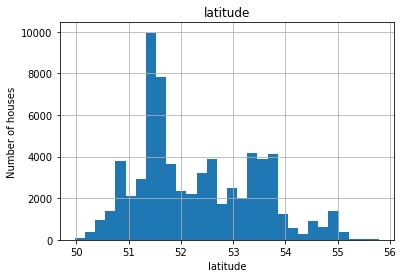

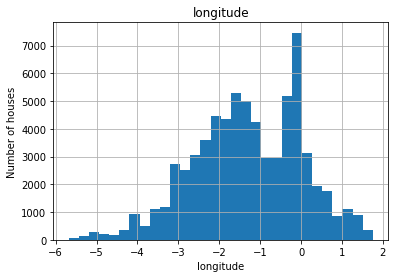

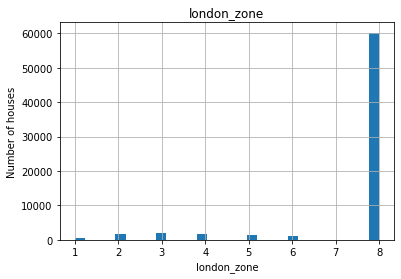

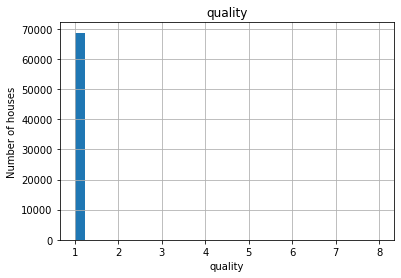

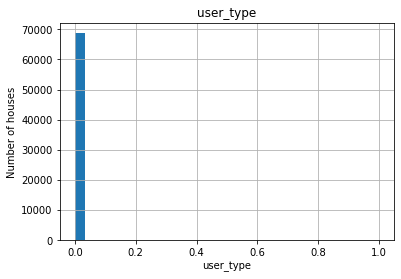

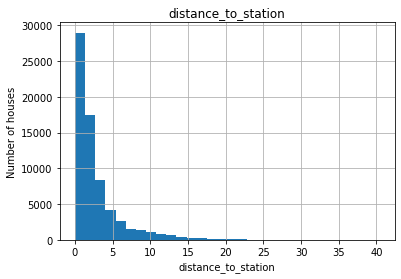

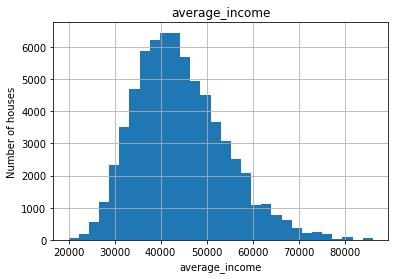

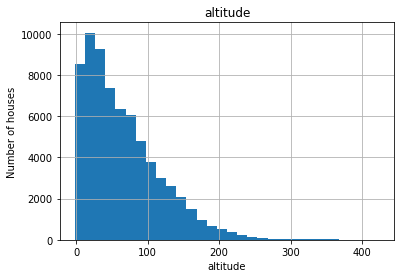

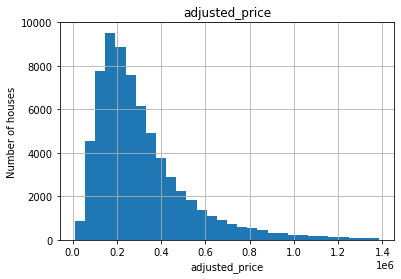

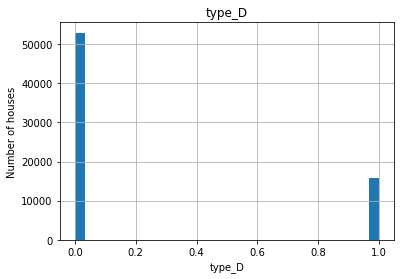

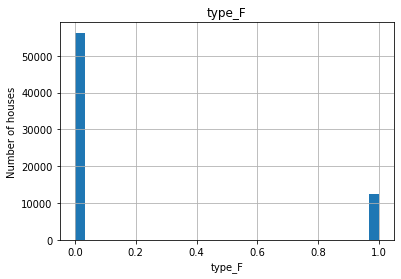

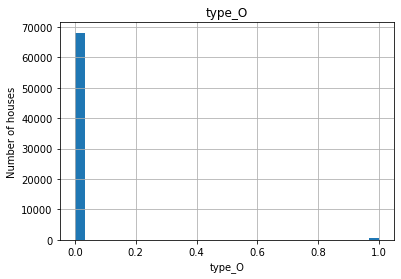

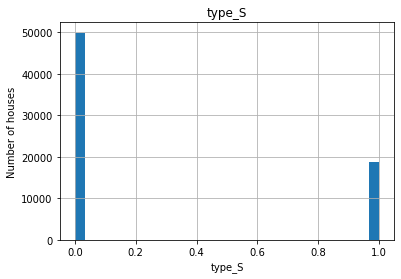

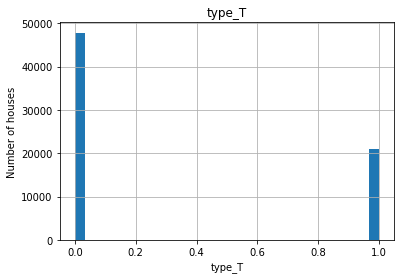

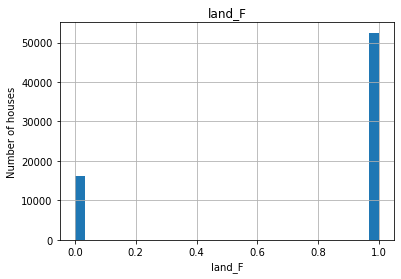

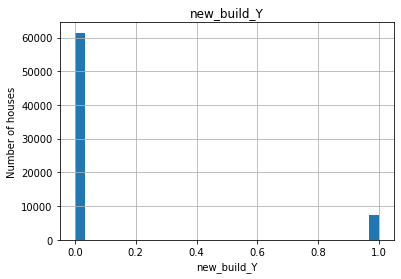

In [14]:
def analyse_continuous(df, var):
    df = df.copy()
    df[var].hist(bins=30)
    plt.ylabel('Number of houses')
    plt.xlabel(var)
    plt.title(var)
    plt.show()


for var in num_vars:
    analyse_continuous(data, var)

In [15]:
for var in [
 'london_zone',
 'distance_to_station',
 'average_income',
 'adjusted_price']:
    X_train[var] = np.log(X_train[var])
    X_test[var] = np.log(X_test[var])

In [16]:
# check that test set does not contain null values in the engineered variables
[var for var in [
 'london_zone',
 'distance_to_station',
 'average_income',
 'adjusted_price'] if X_test[var].isnull().sum() > 0]

[]

In [17]:
# same for train set
[var for var in ['latitude',
 'longitude',
 'london_zone',
 'distance_to_station',
 'average_income',
 'adjusted_price'] if X_train[var].isnull().sum() > 0]

[]

In [18]:
X_train[X_train['longitude'].isnull()]

,id,postcode,primary_address,secondary_address,street,latitude,longitude,grid_ref,county,district,ward,district_code,ward_code,county_code,constituency,region,london_zone,middle_layer_super_output_area,postcode_area,postcode_district,quality,user_type,last_updated,nearest_station,distance_to_station,postcode_area.1,postcode_district.1,police_force,water_company,plus_code,average_income,sewage_company,travel_to_work_area,rural_urban,altitude,region_name,area_code,adjusted_price,type_D,type_F,type_O,type_S,type_T,land_F,new_build_Y


## Categorical variables

### Removing rare labels

First, we will group those categories within variables that are present in less than 1% of the observations. That is, all values of categorical variables that are shared by less than 1% of houses, well be replaced by the string "Rare".

To learn more about how to handle categorical variables visit our course [Feature Engineering for Machine Learning](https://www.udemy.com/feature-engineering-for-machine-learning/?couponCode=UDEMY2018) in Udemy.

In [19]:
# let's capture the categorical variables in a list

cat_vars = [var for var in X_train.columns if X_train[var].dtype == 'O']

In [20]:
def find_frequent_labels(df, var, rare_perc):
    
    # function finds the labels that are shared by more than
    # a certain % of the houses in the dataset

    df = df.copy()

    tmp = df.groupby(var)['adjusted_price'].count() / len(df)

    return tmp[tmp > rare_perc].index


for var in cat_vars:
    
    # find the frequent categories
    frequent_ls = find_frequent_labels(X_train, var, 0.01)
    
    # replace rare categories by the string "Rare"
    X_train[var] = np.where(X_train[var].isin(
        frequent_ls), X_train[var], 'Rare')
    
    X_test[var] = np.where(X_test[var].isin(
        frequent_ls), X_test[var], 'Rare')

### Encoding of categorical variables

Next, we need to transform the strings of the categorical variables into numbers. We will do it so that we capture the monotonic relationship between the label and the target.

To learn more about how to encode categorical variables visit our course [Feature Engineering for Machine Learning](https://www.udemy.com/feature-engineering-for-machine-learning/?couponCode=UDEMY2018) in Udemy.

In [21]:
# this function will assign discrete values to the strings of the variables,
# so that the smaller value corresponds to the category that shows the smaller
# mean house sale price


def replace_categories(train, test, var, target):

    # order the categories in a variable from that with the lowest
    # house sale price, to that with the highest
    ordered_labels = train.groupby([var])[target].mean().sort_values().index

    # create a dictionary of ordered categories to integer values
    ordinal_label = {k: i for i, k in enumerate(ordered_labels, 0)}

    # use the dictionary to replace the categorical strings by integers
    train[var] = train[var].map(ordinal_label)
    test[var] = test[var].map(ordinal_label)

In [22]:
for var in cat_vars:
    replace_categories(X_train, X_test, var, 'adjusted_price')

In [23]:
# check absence of na in the train set
[var for var in X_train.columns if X_train[var].isnull().sum() > 0]

[]

In [24]:
# check absence of na in the test set
[var for var in X_test.columns if X_test[var].isnull().sum() > 0]

[]

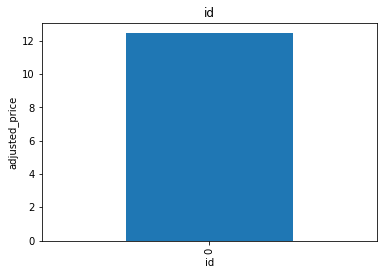

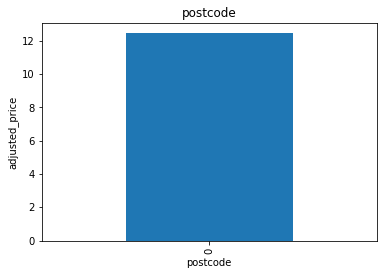

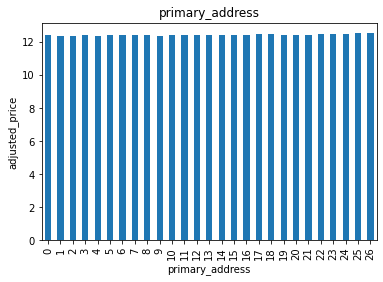

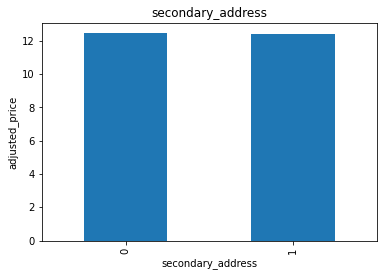

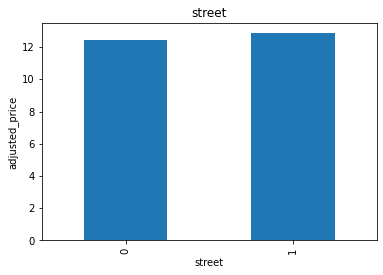

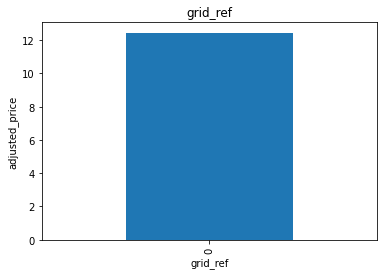

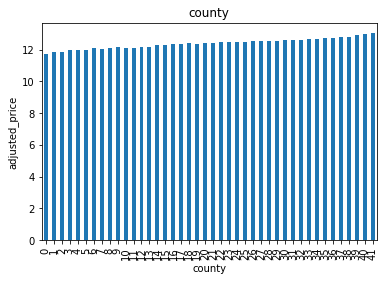

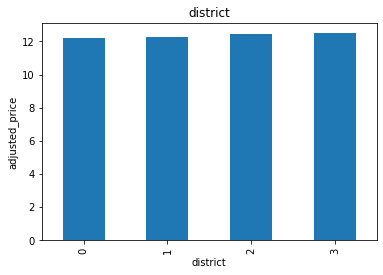

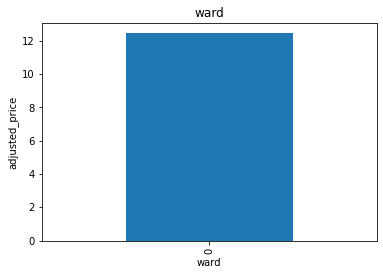

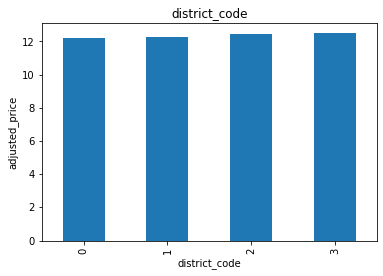

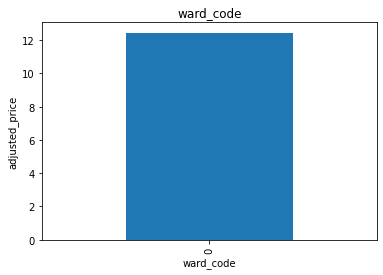

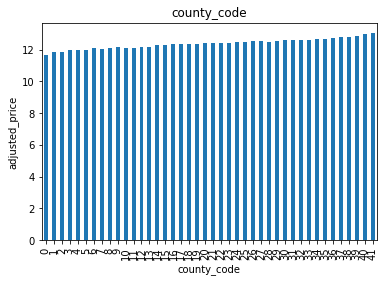

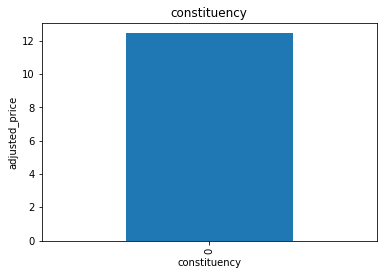

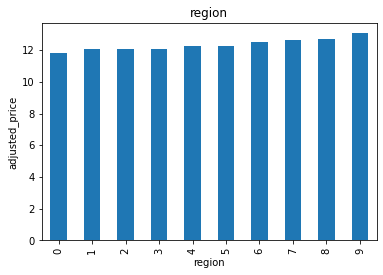

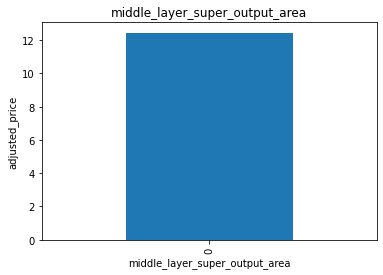

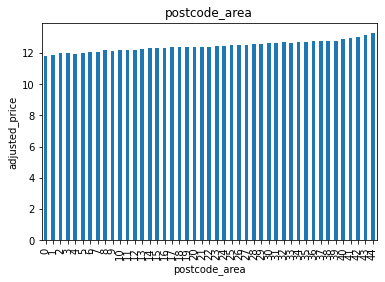

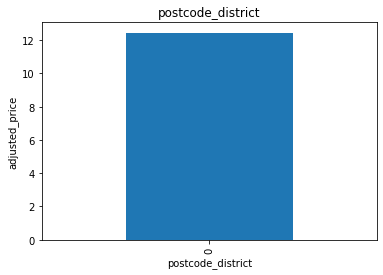

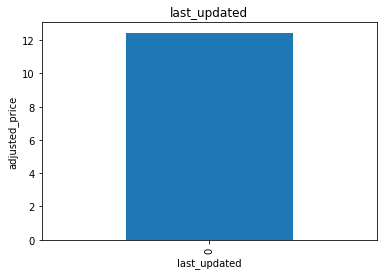

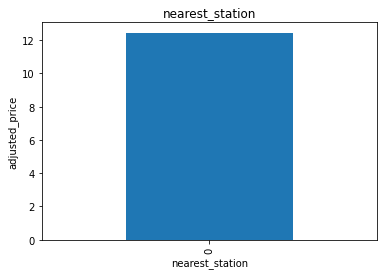

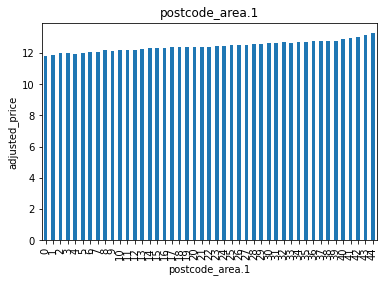

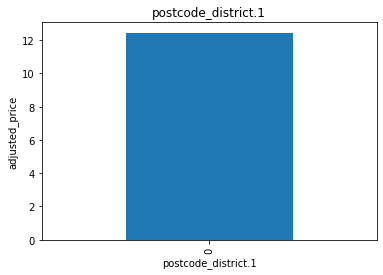

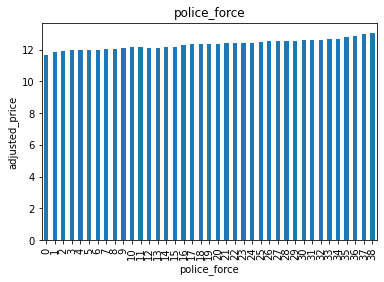

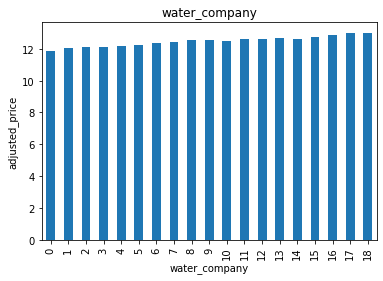

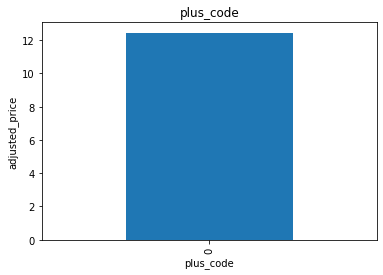

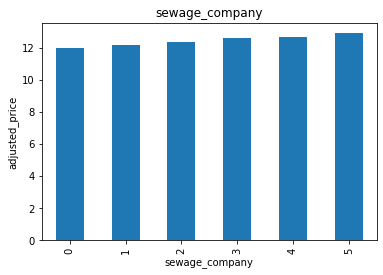

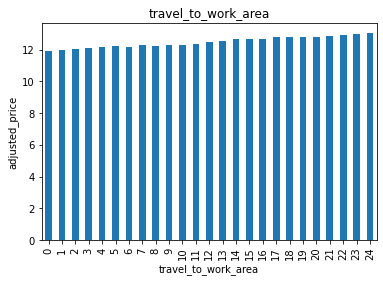

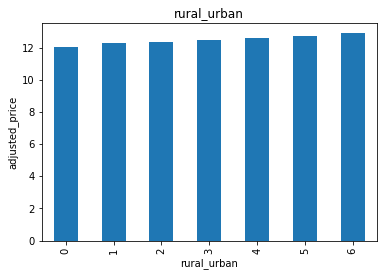

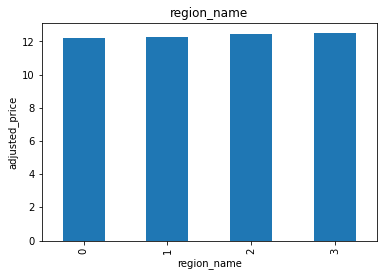

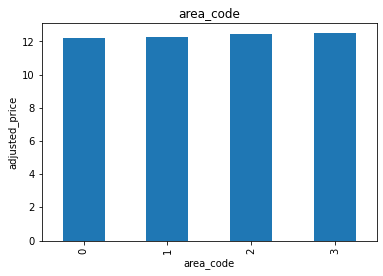

In [25]:
# let me show you what I mean by monotonic relationship
# between labels and target

def analyse_vars(df, var):
    
    # function plots median house sale price per encoded
    # category
    
    df = df.copy()
    df.groupby(var)['adjusted_price'].median().plot.bar()
    plt.title(var)
    plt.ylabel('adjusted_price')
    plt.show()
    
for var in cat_vars:
    analyse_vars(X_train, var)

The monotonic relationship is particularly clear for the variables MSZoning, Neighborhood, and ExterQual. Note how, the higher the integer that now represents the category, the higher the mean house sale price.

(remember that the target is log-transformed, that is why the differences seem so small).

## Feature Scaling

For use in linear models, features need to be either scaled or normalised. In the next section, I will scale features to the minimum and maximum values:

In [38]:
[var for var in X_train.columns if var not in ['id', 'adjusted_price', 'distance_to_station']]

['postcode',
 'primary_address',
 'secondary_address',
 'street',
 'latitude',
 'longitude',
 'grid_ref',
 'county',
 'district',
 'ward',
 'district_code',
 'ward_code',
 'county_code',
 'constituency',
 'region',
 'london_zone',
 'middle_layer_super_output_area',
 'postcode_area',
 'postcode_district',
 'quality',
 'user_type',
 'last_updated',
 'nearest_station',
 'postcode_area.1',
 'postcode_district.1',
 'police_force',
 'water_company',
 'plus_code',
 'average_income',
 'sewage_company',
 'travel_to_work_area',
 'rural_urban',
 'altitude',
 'region_name',
 'area_code',
 'type_D',
 'type_F',
 'type_O',
 'type_S',
 'type_T',
 'land_F',
 'new_build_Y']

In [39]:
# capture all variables in a list
# except the target and the ID

train_vars = [var for var in X_train.columns if var not in ['id', 'adjusted_price', 'distance_to_station']]

# count number of variables
len(train_vars)

42

In [34]:
X_test.dtypes == 'float64'

id                                False
postcode                          False
primary_address                   False
secondary_address                 False
street                            False
latitude                           True
longitude                          True
grid_ref                          False
county                            False
district                          False
ward                              False
district_code                     False
ward_code                         False
county_code                       False
constituency                      False
region                            False
london_zone                        True
middle_layer_super_output_area    False
postcode_area                     False
postcode_district                 False
quality                            True
user_type                          True
last_updated                      False
nearest_station                   False
distance_to_station                True


In [30]:
X_train.isna().sum()

id                                0
postcode                          0
primary_address                   0
secondary_address                 0
street                            0
latitude                          0
longitude                         0
grid_ref                          0
county                            0
district                          0
ward                              0
district_code                     0
ward_code                         0
county_code                       0
constituency                      0
region                            0
london_zone                       0
middle_layer_super_output_area    0
postcode_area                     0
postcode_district                 0
quality                           0
user_type                         0
last_updated                      0
nearest_station                   0
distance_to_station               0
postcode_area.1                   0
postcode_district.1               0
police_force                

In [40]:
# create scaler
scaler = MinMaxScaler()

#  fit  the scaler to the train set
scaler.fit(X_train[train_vars]) 

# transform the train and test set
X_train[train_vars] = scaler.transform(X_train[train_vars])

X_test[train_vars] = scaler.transform(X_test[train_vars])

In [41]:
X_train.head()

,id,postcode,primary_address,secondary_address,street,latitude,longitude,grid_ref,county,district,ward,district_code,ward_code,county_code,constituency,region,london_zone,middle_layer_super_output_area,postcode_area,postcode_district,quality,user_type,last_updated,nearest_station,distance_to_station,postcode_area.1,postcode_district.1,police_force,water_company,plus_code,average_income,sewage_company,travel_to_work_area,rural_urban,altitude,region_name,area_code,adjusted_price,type_D,type_F,type_O,type_S,type_T,land_F,new_build_Y
10823,0,0.0,0.384615,0.0,0.0,0.297610,0.708851,0.0,0.951220,0.666667,0.0,0.666667,0.0,0.951220,0.0,0.777778,1.000000,0.0,0.522727,0.0,0.0,0.0,0.0,0.0,0.689014,0.522727,0.0,0.947368,0.888889,0.0,0.626321,1.0,0.708333,0.666667,0.269953,0.666667,0.666667,12.926339,0.0,0.0,0.0,0.0,1.0,1.0,0.0
52778,0,0.0,0.846154,1.0,0.0,0.240519,0.738338,0.0,1.000000,0.666667,0.0,0.666667,0.0,1.000000,0.0,1.000000,0.666667,0.0,0.522727,0.0,0.0,0.0,0.0,0.0,-0.375478,0.522727,0.0,1.000000,0.944444,0.0,0.582384,1.0,1.000000,0.666667,0.110329,0.666667,0.666667,12.416423,0.0,1.0,0.0,0.0,0.0,0.0,0.0
16466,0,0.0,0.461538,0.0,0.0,0.420328,0.552343,0.0,0.292683,0.666667,0.0,0.666667,0.0,0.292683,0.0,0.555556,1.000000,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,1.025923,0.500000,0.0,0.368421,0.277778,0.0,0.591111,0.4,0.333333,0.333333,0.298122,0.666667,0.666667,12.862997,1.0,0.0,0.0,0.0,0.0,1.0,0.0
44605,0,0.0,0.923077,0.0,0.0,0.470684,0.716527,0.0,0.146341,0.666667,0.0,0.666667,0.0,0.146341,0.0,0.444444,1.000000,0.0,0.340909,0.0,0.0,0.0,0.0,0.0,2.408421,0.340909,0.0,0.263158,0.333333,0.0,0.680413,0.4,0.375000,1.000000,0.028169,0.666667,0.666667,13.213782,1.0,0.0,0.0,0.0,0.0,1.0,0.0
46591,0,0.0,0.153846,0.0,0.0,0.443657,0.597107,0.0,0.414634,0.666667,0.0,0.666667,0.0,0.414634,0.0,0.444444,1.000000,0.0,0.477273,0.0,0.0,0.0,0.0,0.0,1.169875,0.477273,0.0,0.500000,0.277778,0.0,0.541677,0.4,0.458333,0.500000,0.178404,0.666667,0.666667,12.209063,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [42]:
# let's now save the train and test sets for the next notebook!

X_train.to_csv('../data/processed/xtrain.csv', index=False)
X_test.to_csv('../data/processed/xtest.csv', index=False)

That concludes the feature engineering section for this dataset.

**Remember: the aim of this course is to show you how to put models in production. We deliberately kept the feature engineering pipeline, yet included many of the traditional engineering steps, to give you a full flavour of building and deploying a machine learning model pipeline** as we will see in the coming sections of the course.

That is all for this notebook. We hope you enjoyed it and see you in the next one!